In [ ]:
!wc -l data/conversion_project.csv

In [ ]:
!ls -lh data|grep conversion_project.csv

In [ ]:
!awk -F',' '{print NF; exit}' data/conversion_project.csv

## Load Dataset

In [1]:
import datetime
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
df = pd.read_csv('data/conversion_project.csv')

In [2]:
df.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [3]:
df.shape

(316200, 6)

## Descriptive Stats

from below results we can tell that 
1. we don't have missing data
2. this site is probably a US site, with a large amount of Chinese users
3. average user is around 30 years old
4. conversion rate is around 3%

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316200 entries, 0 to 316199
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   country              316200 non-null  object
 1   age                  316200 non-null  int64 
 2   new_user             316200 non-null  int64 
 3   source               316200 non-null  object
 4   total_pages_visited  316200 non-null  int64 
 5   converted            316200 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 14.5+ MB


In [5]:
df.describe(include = object)

,country,source
count,316200,316200
unique,4,3
top,US,Seo
freq,178092,155040


In [6]:
df.describe()

,age,new_user,total_pages_visited,converted
count,316200.000000,316200.000000,316200.000000,316200.000000
mean,30.569858,0.685465,4.872966,0.032258
std,8.271802,0.464331,3.341104,0.176685
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,123.000000,1.000000,29.000000,1.000000


In [7]:
df.country.value_counts()

US         178092
China       76602
UK          48450
Germany     13056
Name: country, dtype: int64

In [8]:
df.source.value_counts()

Seo       155040
Ads        88740
Direct     72420
Name: source, dtype: int64

## Age Outliers

age 123 and 111 seem unrealistic with so many pages visited

In [9]:
x = df.age
print(sorted(df.age.unique(), reverse = True))
print(df[df.age > 79])
# remove age outliers
df = df[df.age < 100]

[123, 111, 79, 77, 73, 72, 70, 69, 68, 67, 66, 65, 64, 63, 62, 61, 60, 59, 58, 57, 56, 55, 54, 53, 52, 51, 50, 49, 48, 47, 46, 45, 44, 43, 42, 41, 40, 39, 38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17]
        country  age  new_user source  total_pages_visited  converted
90928   Germany  123         0    Seo                   15          1
295581       UK  111         0    Ads                   10          1


## Data Exploratory

quickly investigate the variables and see how their distribution differs against the conversion classes.
this will help us understand where there is a good indicator for the prediction

<AxesSubplot:xlabel='country'>

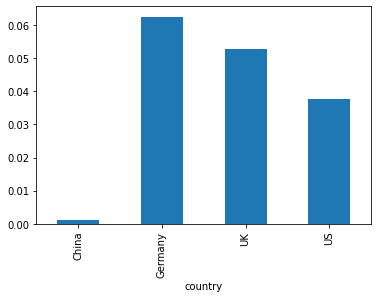

In [22]:
df.groupby(['country'])['converted'].mean().plot.bar()

(array([ 48449.,      0.,      0., 178092.,      0.,      0.,  76602.,
             0.,      0.,  13055.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

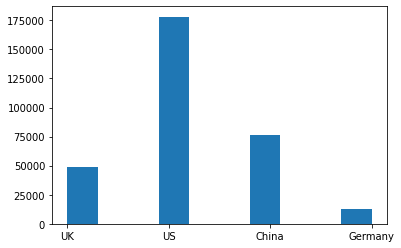

In [23]:
plt.hist(df.country)

(array([ 88739.,      0.,      0.,      0.,      0., 155039.,      0.,
             0.,      0.,  72420.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

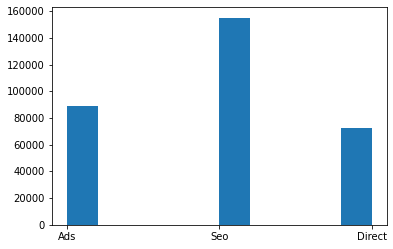

In [24]:
plt.hist(df.source)

(array([306000.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,  10198.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

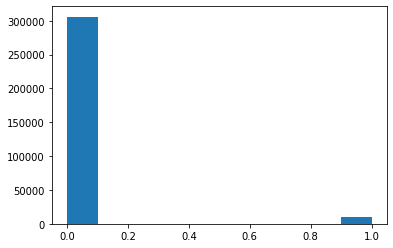

In [25]:
plt.hist(df.converted)

<AxesSubplot:xlabel='total_pages_visited'>

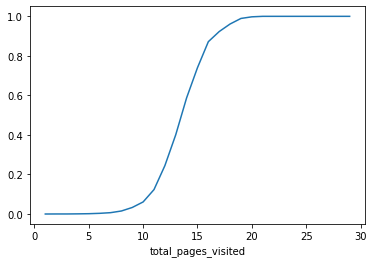

In [29]:
df.groupby(['total_pages_visited'])['converted'].mean().plot()

## correlation matrix

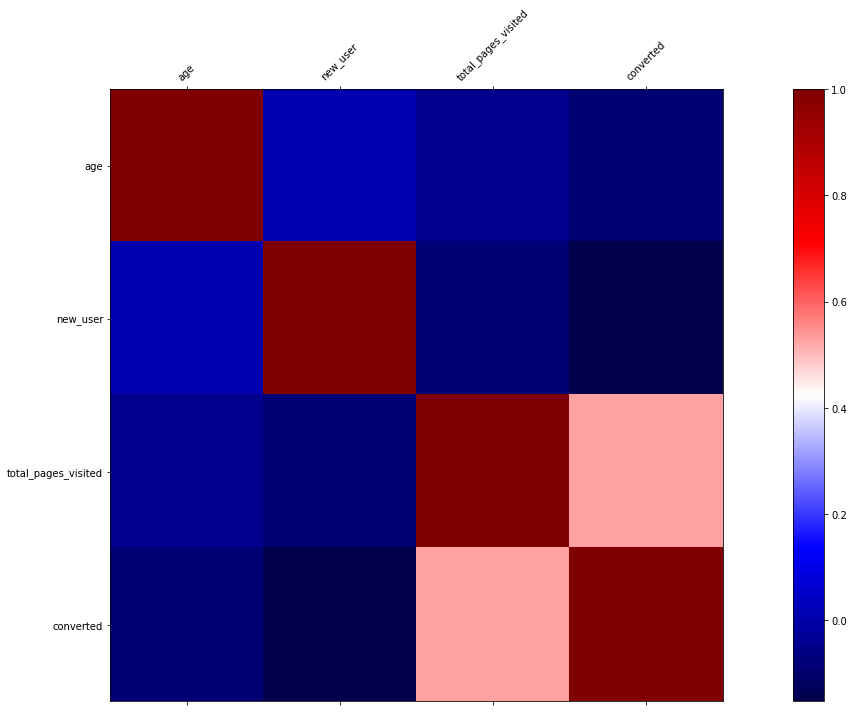

In [26]:
fig, ax = plt.subplots(figsize = (20,10))
df_corr = df.corr()  
im = ax.matshow(df_corr, cmap = 'seismic')
fig.colorbar(im)
labels = [col.lower() for col in df_corr.columns]
plt.xticks(range(len(df_corr.columns)), df_corr.columns, rotation = 45)
plt.yticks(range(len(df_corr.columns)), df_corr.columns) 
plt.tight_layout()

,source,converted
0,Ads,0.034472
1,Direct,0.028169
2,Seo,0.032888


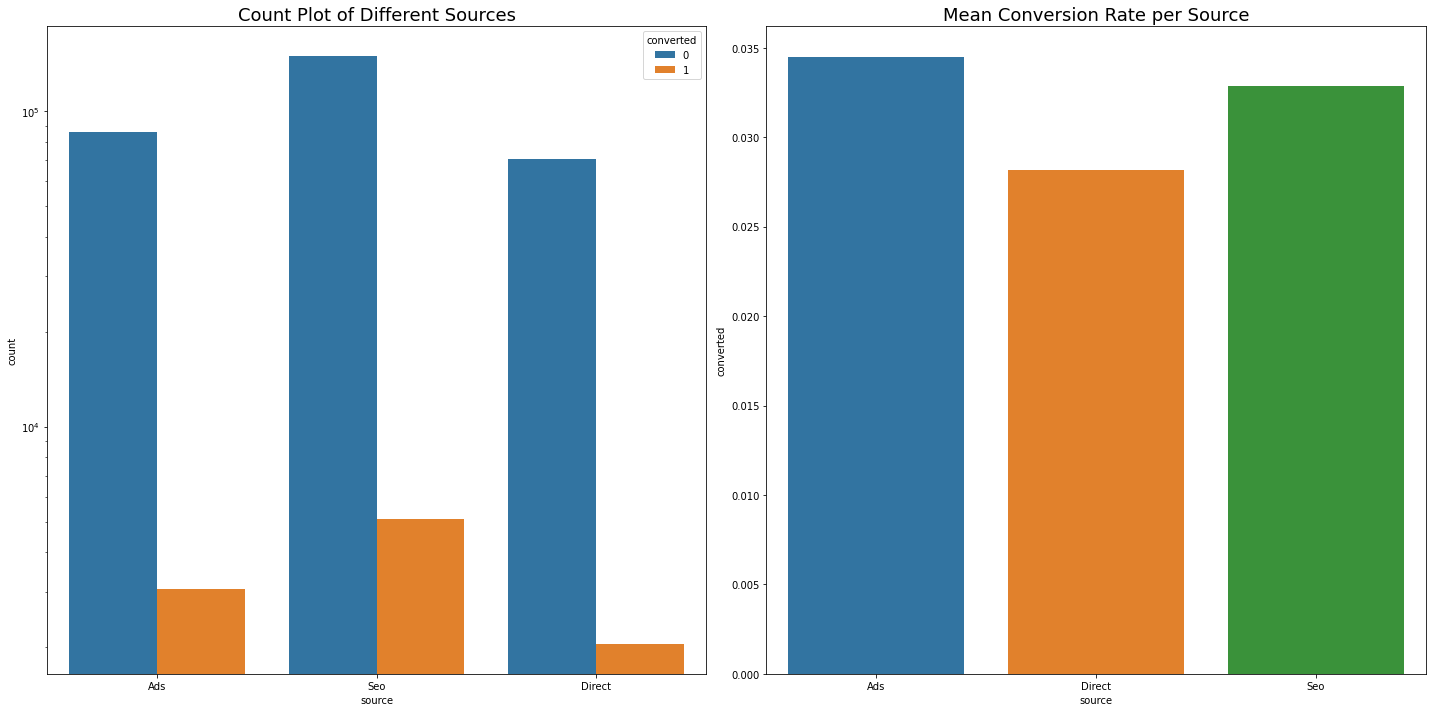

In [35]:
import seaborn as sns
grouped = df[['source', 'converted']].groupby('source').mean().reset_index()
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,10))
sns.countplot(x='source', hue='converted', data=df, ax=ax[0])
ax[0].set_title('Count Plot of Different Sources', fontsize=18)
ax[0].set_yscale('log')
# a barplot shows only the mean
sns.barplot(x='source', y='converted', data=grouped, ax=ax[1]);
ax[1].set_title('Mean Conversion Rate per Source', fontsize=18)
plt.tight_layout() 
grouped

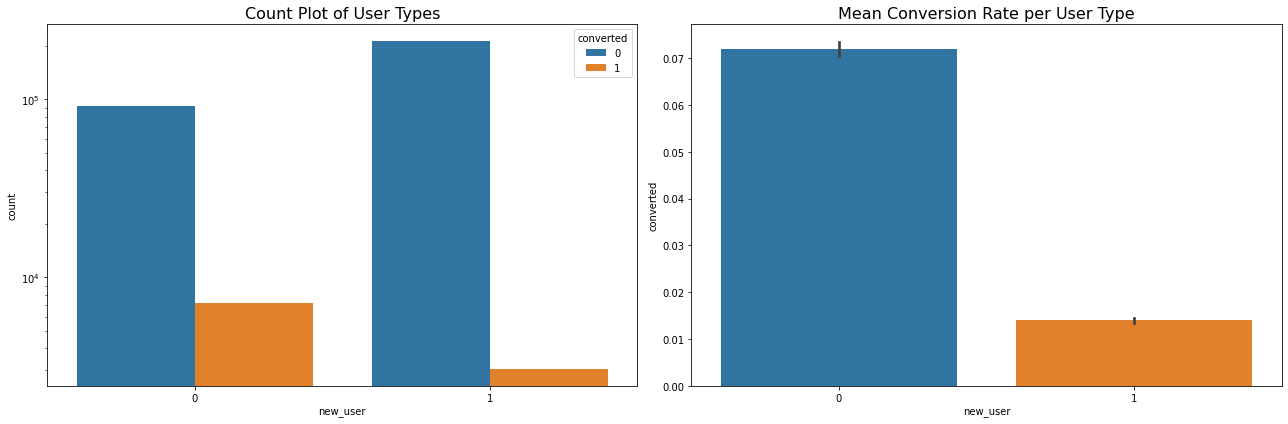

In [36]:
grouped = df[['new_user', 'converted']].groupby('new_user').mean().reset_index()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.countplot(x='new_user', hue='converted', data=df, ax=ax[0])
ax[0].set_title('Count Plot of User Types', fontsize=16)
ax[0].set_yscale('log')
sns.barplot(x='new_user', y='converted', data=df, ax=ax[1]);
ax[1].set_title('Mean Conversion Rate per User Type', fontsize=16)
plt.tight_layout()
plt.show()

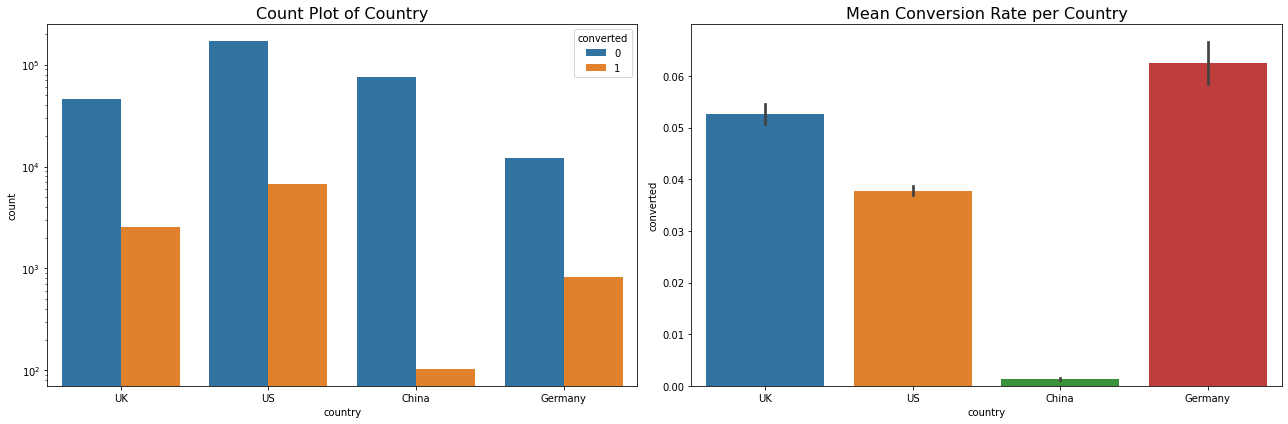

In [37]:
# Visualization of different countries

grouped = df[['country', 'converted']].groupby('country').mean().reset_index()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.countplot(x='country', hue='converted', data=df, ax=ax[0])
ax[0].set_title('Count Plot of Country', fontsize=16)
ax[0].set_yscale('log')
sns.barplot(x='country', y='converted', data=df, ax=ax[1]);
ax[1].set_title('Mean Conversion Rate per Country', fontsize=16)
plt.tight_layout()
plt.show()

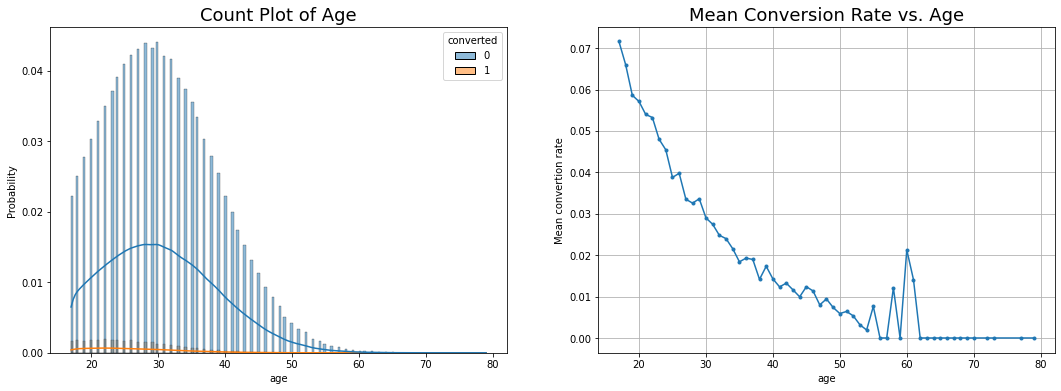

In [56]:
grouped = df[['age', 'converted']].groupby('age').mean().reset_index() 
hist_kws={'histtype':'bar', 'edgecolor':'black', 'alpha':0.2}
fig,ax = plt.subplots(nrows=1, ncols=2,figsize=(18,6))
sns.histplot(data = df, x = 'age', hue = 'converted',ax=ax[0],stat='probability', kde = True)
ax[0].set_title('Count Plot of Age', fontsize=18)
ax[1].plot(grouped['age'], grouped['converted'], '.-')
ax[1].set_title('Mean Conversion Rate vs. Age', fontsize=18)
ax[1].set_xlabel('age')
ax[1].set_ylabel('Mean convertion rate')
ax[1].grid(True) 

In [ ]:
grouped = df[['total_pages_visited', 'converted']].groupby('total_pages_visited').mean().reset_index() 

sns.displot(data = df,x = 'total_pages_visited',col = 'converted', kde = True ) 
#ax[0].set_title('Count Plot of Age', fontsize=18)
#ax[0].legend()
fig, ax = plt.subplots(1,1, figsize=(18,6))
ax.plot(grouped['total_pages_visited'], grouped['converted'], '.-')
ax.set_title('Mean Conversion Rate vs. total_pages_visited', fontsize=18)
ax.set_xlabel('total_pages_visited')
ax.set_ylabel('Mean convertion rate')
ax.grid(True) 

In [ ]:
sns.pairplot(df, diag_kind = 'kde')

## prediction model

### logistic regression

In [ ]:
from sklearn.model_selection import train_test_split
conversion_df = pd.get_dummies(df) 
conversion_y = conversion_df.converted
conversion_x = conversion_df.loc[:,conversion_df.columns!='converted']

In [ ]:
c_x_train,c_x_test,c_y_train,c_y_test = train_test_split(conversion_x,conversion_y,test_size=0.3,random_state=0,stratify=conversion_y)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
converted_rate_lr = Pipeline([
    ('scale', StandardScaler()),
    ('lr', LogisticRegression(
        solver = 'lbfgs', class_weight = 'balanced', random_state = 0))
])
converted_or_not = converted_rate_lr.fit(c_x_train,c_y_train)
converted_pred = converted_or_not.predict(c_x_test)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
def confusion_matrix_visual(y_true, y_pred, class_labels, ax=None,title=None, **kwargs):
    """
    Create a confusion matrix heatmap to evaluate classification.
    Parameters:
    - y_test: The true values for y
    - preds: The predicted values for y
    - class_labels: What to label the classes.
    - ax: The matplotlib Axes object to plot on.
    - title: The title for the confusion matrix
    - kwargs: Additional keyword arguments for `seaborn.heatmap()`
    Returns: A confusion matrix heatmap.
    """
    mat = confusion_matrix(y_true, y_pred)
    axes = sns.heatmap(
    mat.T, square=True, annot=True, fmt='d',
    cbar=True, cmap=plt.cm.Blues, ax=ax, **kwargs
    )
    axes.set_xlabel('Actual')
    axes.set_ylabel('Model Prediction')
    tick_marks = np.arange(len(class_labels)) + 0.5
    axes.set_xticks(tick_marks)
    axes.set_xticklabels(class_labels)
    axes.set_yticks(tick_marks)
    axes.set_yticklabels(class_labels, rotation=0)
    axes.set_title(title or 'Confusion Matrix')
    return axes

In [ ]:
confusion_matrix_visual(c_y_test,converted_pred,[0,1])

### random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rf = RandomForestClassifier(n_estimators = 100, random_state = 0)
search_space = {
    'max_depth':[4,8],
    'min_samples_leaf':[4,6]
}
rf_grid = GridSearchCV(
    rf,search_space,cv = 5, scoring = 'precision'
).fit(c_x_train,c_y_train)
rf_grid.score(c_x_test,c_y_test)

### gradient boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators = 100,random_state = 0)
search_space = {
    'max_depth':[4,8],
    'min_samples_leaf':[4,6],
    'learning_rate':[0.1,0.5,1]
}
gb_grid = GridSearchCV(
    gb,search_space,cv = 5,scoring = 'f1_macro'
).fit(c_x_train,c_y_train)
gb_grid.score(c_x_test,c_y_test)

In [ ]:
import graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from graphviz import Source

tree = DecisionTreeClassifier(max_depth = 2, class_weight = {0:1, 1:10}, min_impurity_decrease = 0.001)
tree.fit(c_x_train , c_y_train)
  
#visualize it
export_graphviz(tree, out_file="tree_conversion.dot", feature_names=c_x_train.columns, proportion=True, rotate=True)
with open("tree_conversion.dot") as f:
    dot_graph = f.read()
  
s = Source.from_file("tree_conversion.dot")
s.view()
